In [1]:
import pandas as pd

In [2]:
df_res = pd.read_csv('out.csv')

In [3]:
positive = df_res[df_res.res=='positive']
neutral  = df_res[df_res.res=='neutral']
negative = df_res[df_res.res=='negative']
speech = df_res[df_res.res=='speech']
skip = df_res[df_res.res=='skip']

res_z = neutral[{'from','res'}].groupby('from').res.count()
res_n = negative[{'from','res'}].groupby('from').res.count()
res_p = positive[{'from','res'}].groupby('from').res.count()
res_h = speech[{'from','res'}].groupby('from').res.count()
res_k = skip[{'from','res'}].groupby('from').res.count()

final_z = pd.DataFrame({'from':res_z.index, 'negative':res_z.values})
final_n = pd.DataFrame({'from':res_n.index, 'neutral':res_n.values})
final_p = pd.DataFrame({'from':res_p.index, 'positive':res_p.values})
final_h = pd.DataFrame({'from':res_h.index, 'speech':res_h.values})
final_k = pd.DataFrame({'from':res_k.index, 'skip':res_k.values})

df_final = pd.DataFrame(columns=['from', 'positive', 'neutral', 'negative','speech','skip'])
df_final = df_final.append(final_z)
df_final = df_final.append(final_n)
df_final = df_final.append(final_p)
df_final = df_final.append(final_h)
df_final = df_final.append(final_k)

df_final = df_final.fillna(0)

df_group = df_final.groupby('from').sum()

df_group['score']=(df_group.positive+df_group.speech+df_group.skip+df_group.neutral-df_group.negative)/(df_group.positive+df_group.positive+df_group.speech+df_group.skip+df_group.negative+df_group.neutral)
df_group.sort_values('score', ascending = True)
df_group['from'] = df_group.index

In [5]:
df_group.sort_values('score', ascending = False)

,positive,neutral,negative,speech,skip,score,from
from,,,,,,,
Vladimir Korotkov,0,2,2,0,0,0.000000,Vladimir Korotkov
Александр Липин,2,0,5,0,0,-0.333333,Александр Липин
Николай Тен,0,1,2,0,0,-0.333333,Николай Тен
Алексей Богин,1,0,7,0,2,-0.363636,Алексей Богин
Alexey Yurasov,0,0,1,0,0,-1.000000,Alexey Yurasov
Николай,0,0,4,0,0,-1.000000,Николай


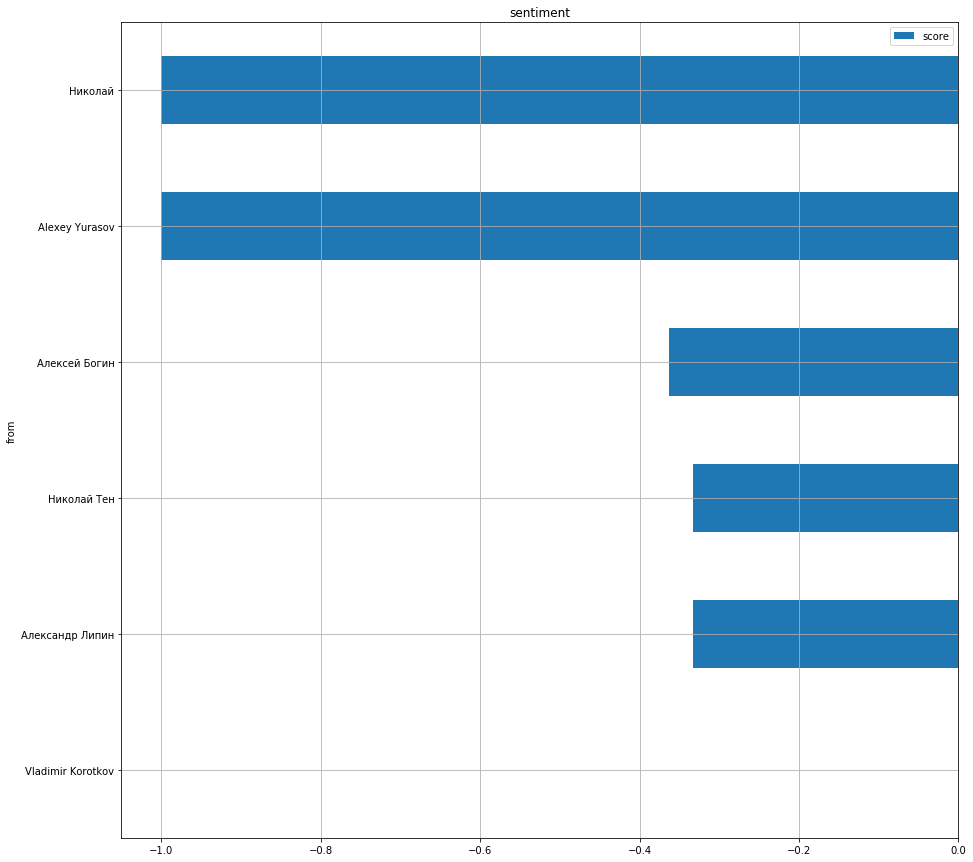

In [6]:
graphic = df_group.sort_values('score', ascending = False).plot(
    x='from',
    y='score',
    kind='barh',
    title = 'sentiment',
    figsize=(15,15),
    grid = True
)
fig = graphic.get_figure()
fig.savefig("report.png")